# **Recipe Data - EDA**

In this secion, we'll explore the raw recipe dataset, found here: 


https://www.kaggle.com/datasets/shuyangli94/food-com-recipes-and-user-interactions?datasetId=311962&sortBy=voteCount


The data comes from food.com - let's first pull in the data and take a look at the basic structure


## Get To Know the Data:

In [70]:
import pandas as pd
import seaborn as sns
import numpy as np

In [71]:
df_recipe = pd.read_csv('RAW_recipes.csv') # import recipe data
df_review = pd.read_csv('RAW_interactions.csv') # import review data

ParserError: ignored

In [ ]:
  `# Read the feature names
df_recipe.columns

In [ ]:
df_review.columns


Each row is a unique recipe, with an name and id. It also comes with a contributor id and submitted time. Some of the features include cook time (minutes), tags, nutritional values, number of steps, and number of ingrediantes. The bulk of the text content will likely come from the 'steps', 'description' and 'ingredients' columns.

In [18]:
# get basic counts
rec_count       = df_recipe['id'].nunique()
cont_count      = df_recipe['contributor_id'].nunique()
avg_contr_count = df_recipe.groupby('contributor_id').agg({'id':'nunique'}).reset_index()['id'].mean()

print('The total recipe count is %s' % rec_count)
print('The count of unique contributors %s' % cont_count)
print('The avg amount of recipe submissions by user is %s' % round(avg_contr_count,2))

The total recipe count is 105440
The count of unique contributors 17881
The avg amount of recipe submissions by user is 5.9


In [35]:
# we may have to do some initial outlier cleaning, lets set the max minutes at 3 days...

df_recipe_filt = df_recipe[df_recipe['minutes'] < 720]


### Visualize Standard Recipe:

We can do some basic distributions of recipe type

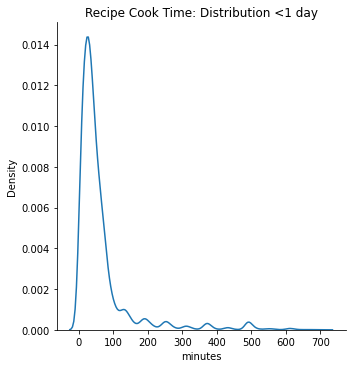

In [58]:
sns.displot(df_recipe_filt, x="minutes", kind="kde").set(title='Recipe Cook Time: Distribution <1 day')

In [54]:
med_time = df_recipe_filt['minutes'].median()

print('The median cook time is %s mins' % med_time)

The median cook time is 40.0 mins


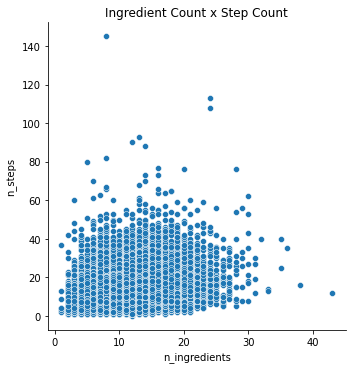

In [64]:
sns.relplot(data=df_recipe_filt, y="n_steps", x="n_ingredients").set(title='Ingredient Count x Step Count')

In [65]:
med_steps       = df_recipe_filt['n_steps'].median()
med_ingredients = df_recipe_filt['n_ingredients'].median()

print('The median recipe step count is %s' % med_steps)
print('The median ingredient count is %s' % med_ingredients)

The median recipe step count is 9.0
The median ingredient count is 9.0
